## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# finding any null values in data
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Finding the number of males and females in the data
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

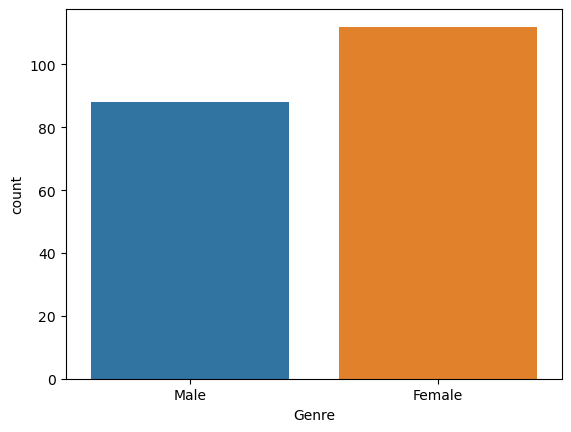

In [7]:
# Visualising the number of males and females in the data
sns.countplot(x="Genre",data=df)
plt.show()

In [8]:
# Computing minimum and maximum age of customers
print(min(df.Age))
print(max(df.Age))

18
70


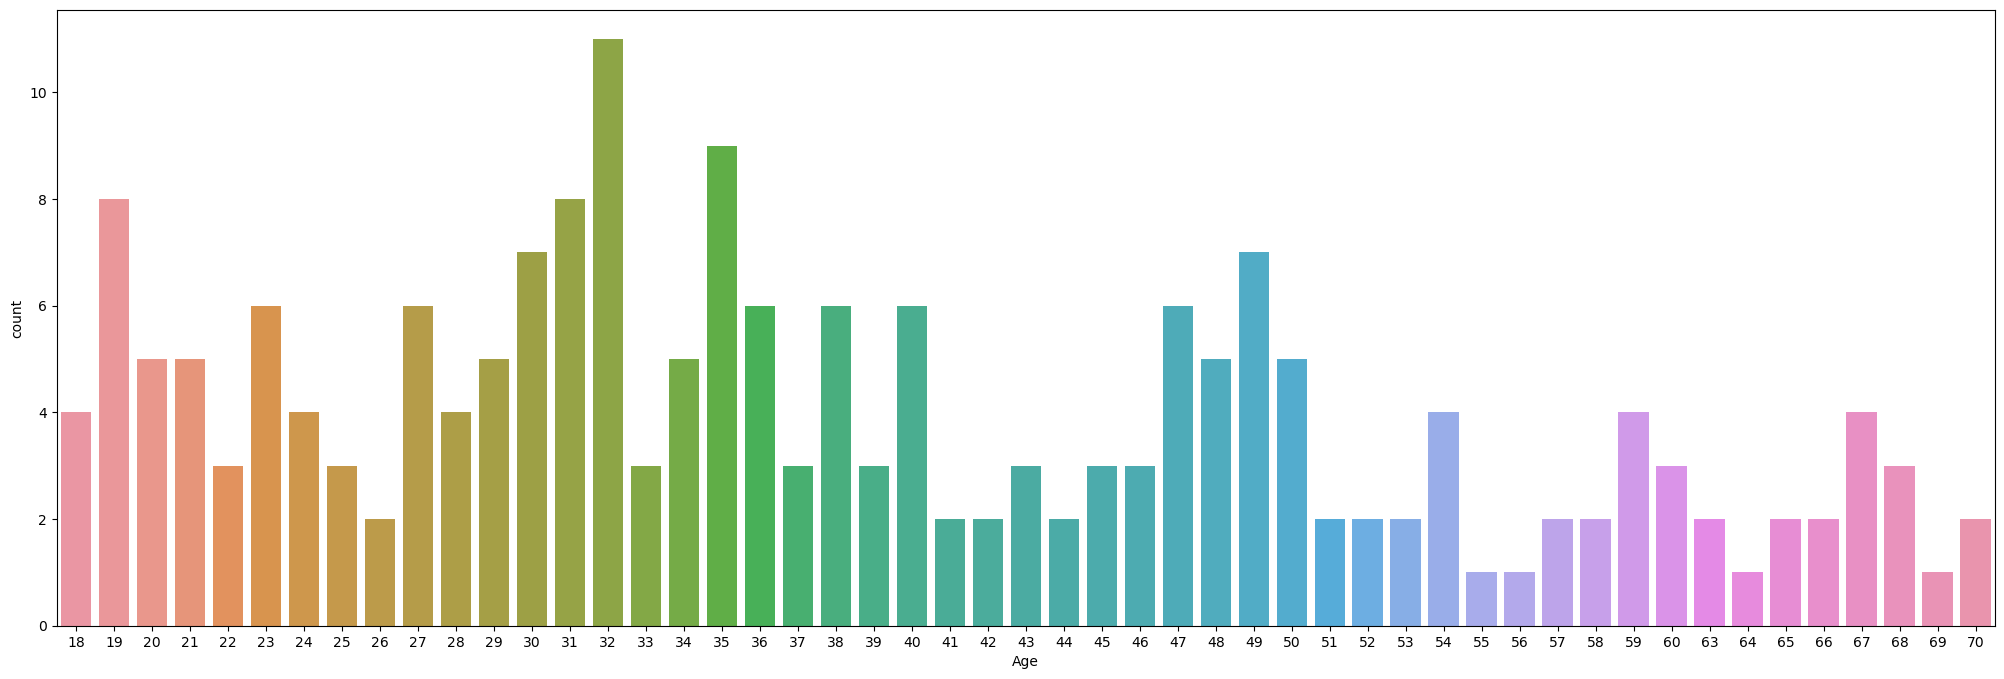

In [9]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df)
plt.show()

Customers with age 32 make for the largest number of customers.

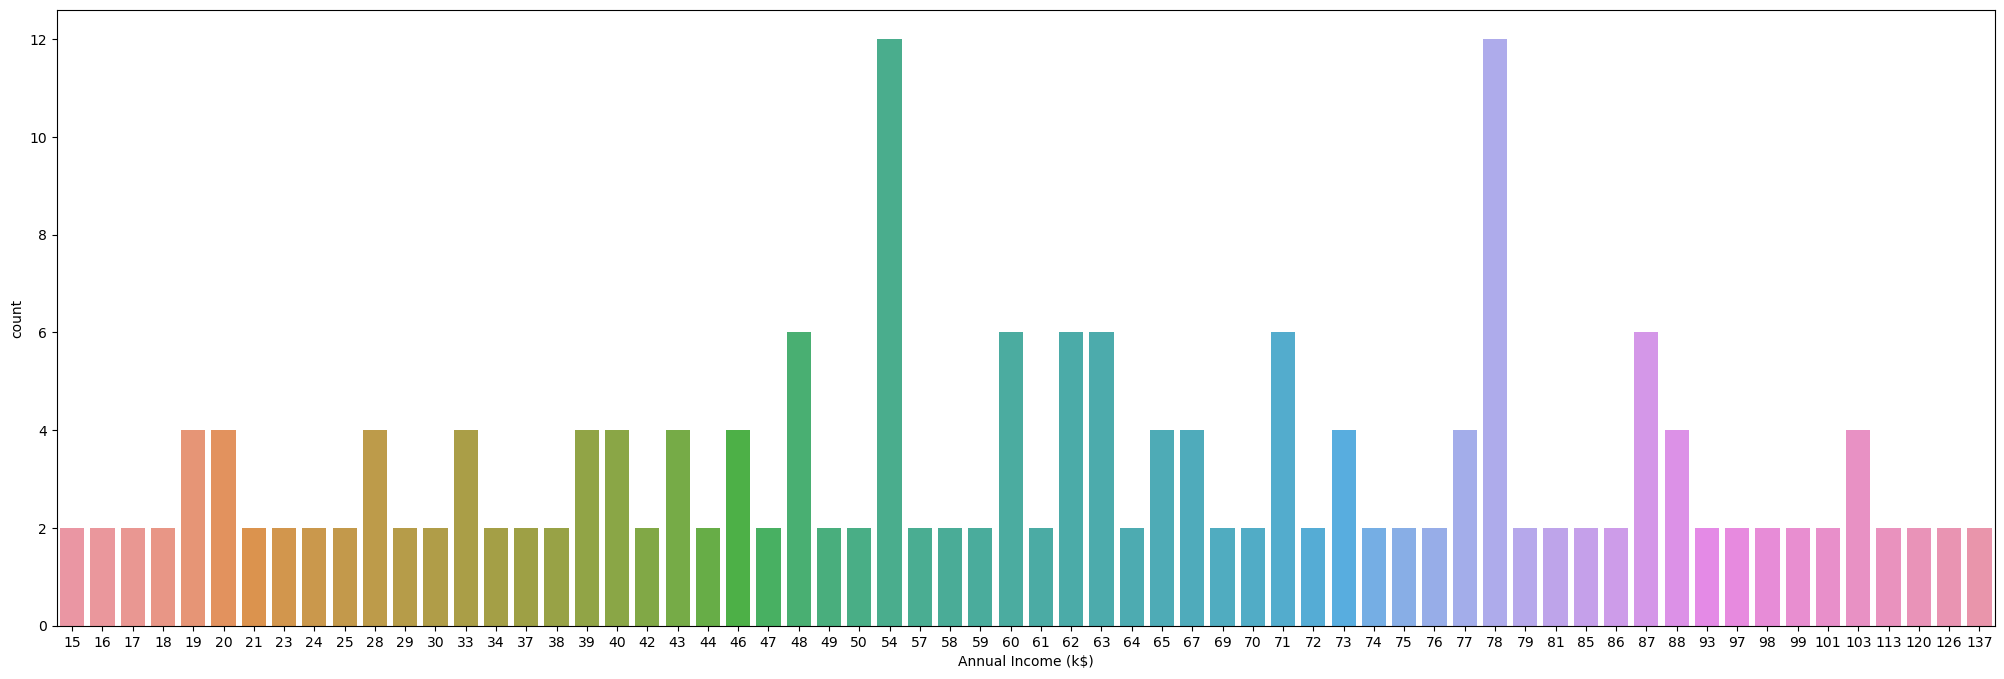

In [10]:
# Visualising the income distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Annual Income (k$)",data=df)
plt.show()

Customers with annual income of 54k and 78k make for the largest number of customers.

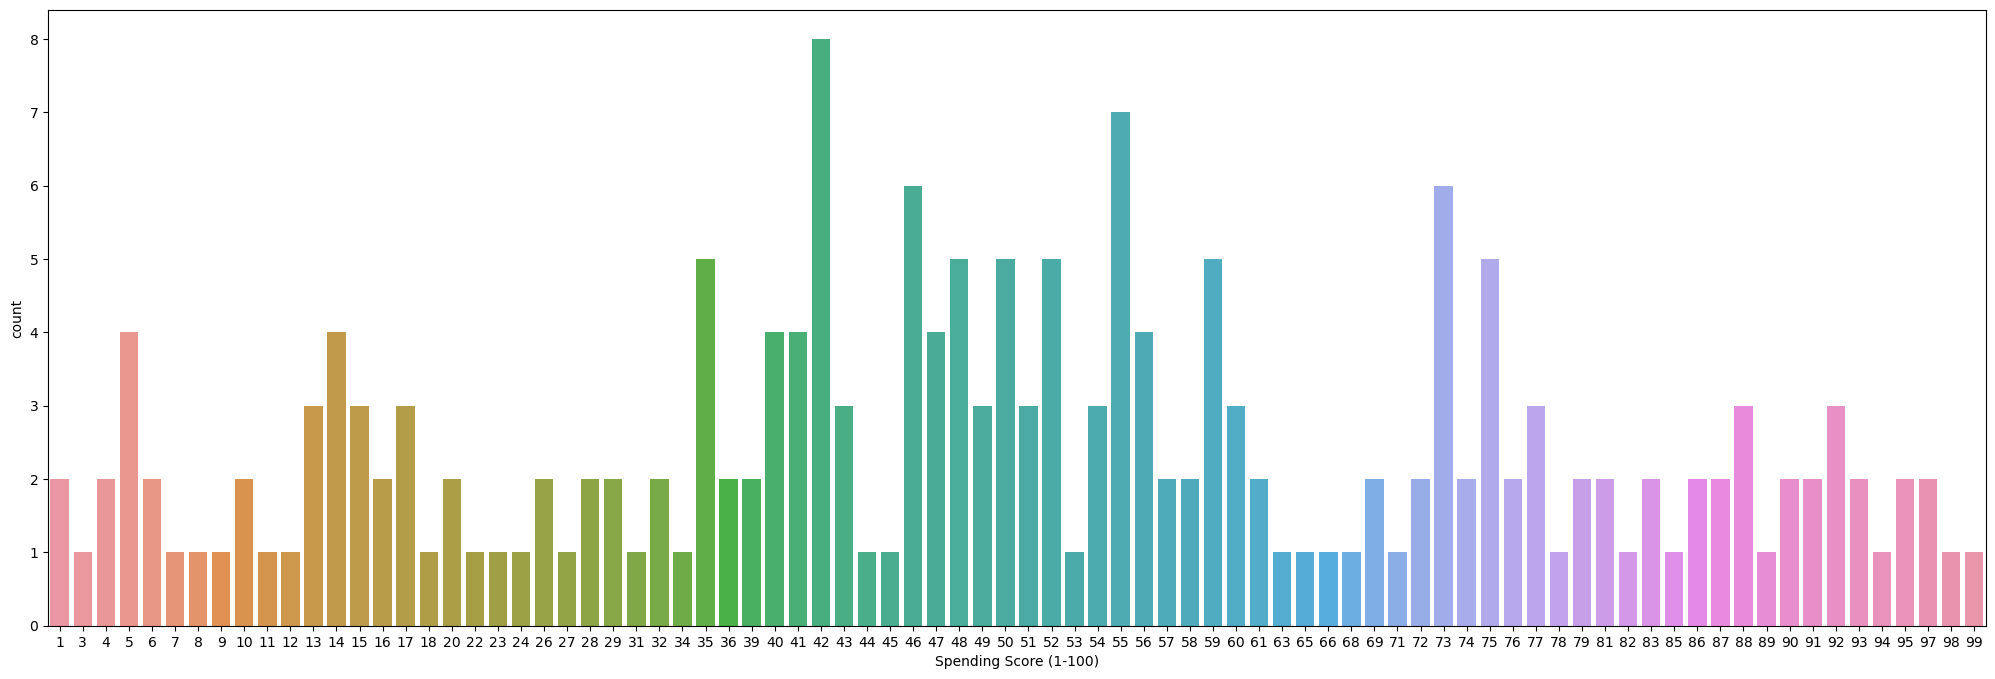

In [11]:
# Visualising the spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df)
plt.show()

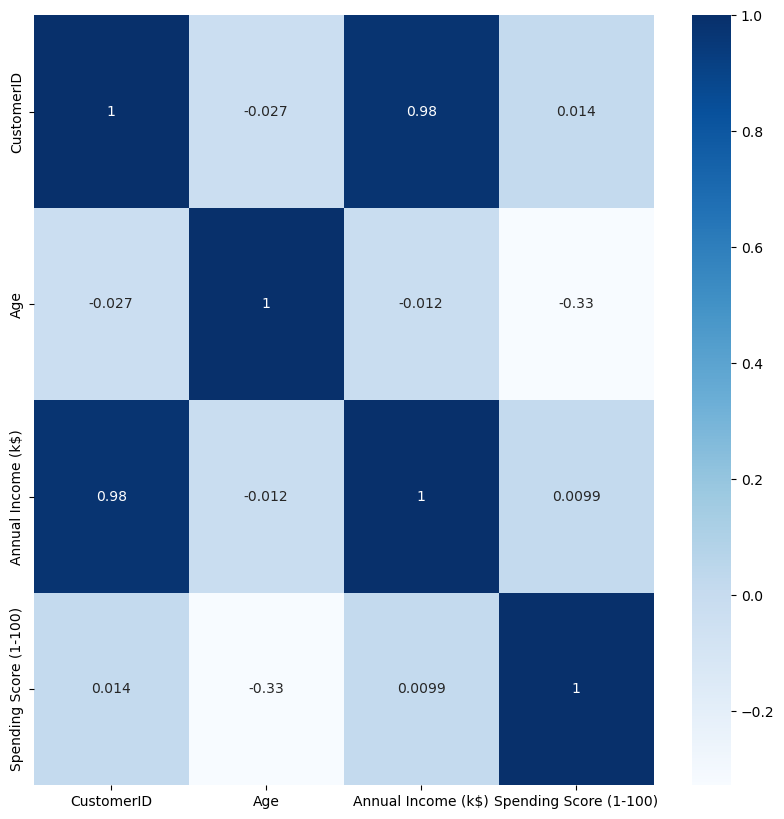

In [12]:
# Finding correaltion between all the parameters in the dataset.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

# k-means Clustering

Making clusters based on Annual income and Spending Score

In [13]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
# cluster on 2 features 
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

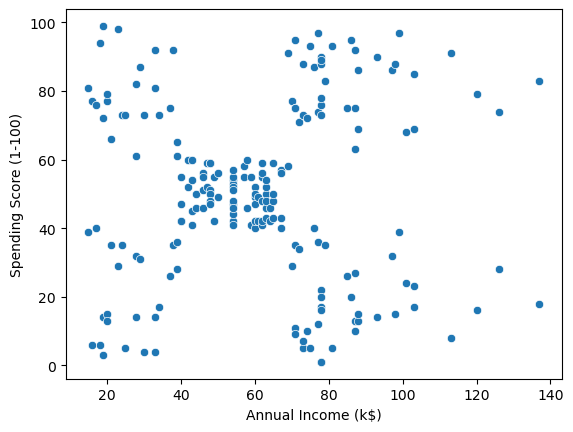

In [15]:
# scatter plot
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])

In [16]:
from sklearn.preprocessing import MinMaxScaler
MS=MinMaxScaler()
df1=pd.DataFrame(MS.fit_transform(df1),columns=df1.columns)
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [17]:
df1.max()

Annual Income (k$)        1.0
Spending Score (1-100)    1.0
dtype: float64

In [18]:
df1.min()

Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [19]:
from sklearn.cluster import KMeans

In [20]:
model=KMeans(4)
model.fit(df1)
y_pred=model.predict(df1)

In [21]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

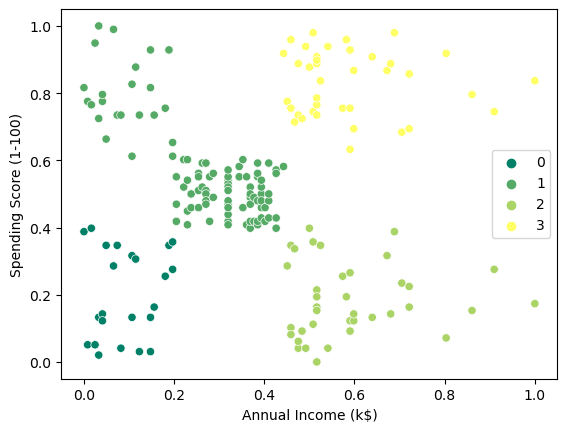

In [22]:
sns.scatterplot(df1['Annual Income (k$)'], df1['Spending Score (1-100)'],hue=y_pred ,palette='summer')
plt.show()

# Selecting best number of clusters

In [23]:
'''

For large datasets, we can't visualize the data using scatter plot because the number of features can be greater than 2

However, we can determine the best number of clusters using 2 methods:

1) The Elbow method
2) The Silhouette method


'''



"\n\nFor large datasets, we can't visualize the data using scatter plot because the number of features can be greater than 2\n\nHowever, we can determine the best number of clusters using 2 methods:\n\n1) The Elbow method\n2) The Silhouette method\n\n\n"

# 1) The Elbow method

# '''
We try different values for k (number of clusters) and plot the value of errors (Within-Cluster Sum of Squares). 
We select the value of k at which the error begins to slowly decrease.

We calculate the error value using (model.inertia_)

'''


In [24]:
k_values = list(range(2, 11))
errors = []

for k in k_values:
    model = KMeans(k)
    model.fit(df1)
    e = model.inertia_
    errors.append(e)

In [25]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10]

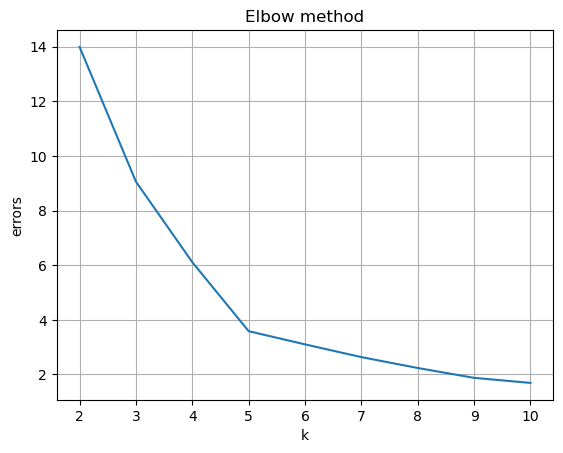

In [26]:
plt.plot(k_values, errors)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('errors')
plt.grid(axis='both')
plt.show()

# silhouette method

# '''

The silhouette score is a value between [−1,+1] that measures the similarity of points within the same cluster. Values closer to +1 indicate better clustering.

We try different values for k (number of clusters) and select the value that yields the largest silhouette score.

We can calculate the silhouette score using sklearn.metrics.silhouette_score function.

'''


In [27]:
from sklearn.metrics import silhouette_score

In [28]:
k_values = list(range(2, 11))
scores = []

for k in k_values:
    model = KMeans(k)
    y = model.fit_predict(df1)
    s = silhouette_score(df1,y)
    scores.append(s)

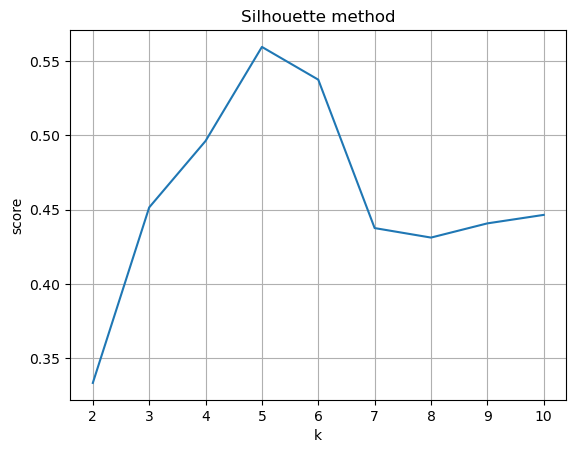

In [29]:
plt.plot(k_values, scores)
plt.title('Silhouette method')
plt.xlabel('k')
plt.ylabel('score')
plt.grid(axis='both')
plt.show()

# Result interpretation

According to the previous clustering, the customers are grouped into the following groups : 
==>People with low income but spend too much (upper-left group).
==>People with low income and low spending (lower-left group).
==>People with moderate income and moderate spending (center group).
==>People with high income and high spending (upper-right group).
==>People with high income and low spending (lower-right group).
If we have more data about these customers (like which products they buy), 
we can assume that customers within the same cluster may be interested in similar products. 
We can use this assumption to build a recommendation system for our store.